<img src = "winter_olympics.jpg">

# DATASET DESCRIPTION

### Data Source:
 - from www.sports-refernce.com
 - Uploaded from https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results/
 
### About the Data:

The file athlete_events.csv contains 271116 rows and 15 columns. Each row corresponds to an individual athlete competing in an individual Olympic event (athlete-events). The columns are:

1.ID - Unique number for each athlete

2.Name - Athlete's name

3.Sex - M or F

4.Age - Integer

5.Height - In centimeters

6.Weight - In kilograms

7.Team - Team name

8.NOC - National Olympic Committee 3-letter code

9.Games - Year and season

10.Year - Integer

11.Season - Summer or Winter

12.City - Host city

13.Sport - Sport

14.Event - Event

15.Medal - Gold, Silver, Bronze, or NA


### Importing Modules

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels
import statsmodels.stats as stats
import seaborn as sns

### Importing the Data

In [3]:
#read data from dropbox file
athlete_events = pd.read_csv('https://www.dropbox.com/s/wh8i7as7njlkfpe/athlete_events.csv?dl=1')

# view head, column names, summary of numeric columns
print(list(athlete_events)) 
athlete_events.head()

['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games', 'Year', 'Season', 'City', 'Sport', 'Event', 'Medal']


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
#read data from dropbox file
noc = pd.read_csv('https://www.dropbox.com/s/9ihxl74go5fusfl/noc_regions.csv?dl=1')

# view head, column names, summary of numeric columns
print(list(noc)) 
noc.head()

['NOC', 'region', 'notes']


,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


### Merging Data

In [5]:
merged_data = pd.merge(athlete_events, noc, on = 'NOC', how ='left')

In [30]:
merged_data.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


### Where were the olympics held each year?

In [53]:
athlete_events[['Year','City']].drop_duplicates().sort_values('Year')

,Year,City
3079,1896,Athina
3,1900,Paris
711,1904,St. Louis
268,1906,Athina
1149,1908,London
35,1912,Stockholm
2,1920,Antwerpen
672,1924,Chamonix
39,1924,Paris
133,1928,Amsterdam


### What sports did Team India participate in?

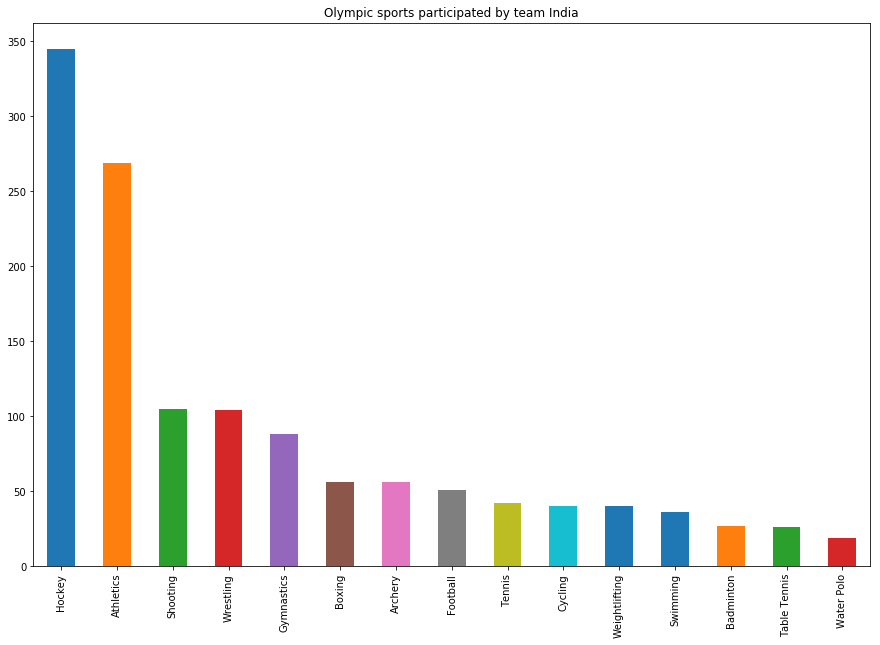

In [7]:
plt.figure(figsize =(15, 10))
tops=athlete_events[athlete_events['Team']=='India'].Sport.value_counts().head(n=15)
tops.plot(kind = 'bar')
plt.title('Olympic sports participated by team India')
plt.show()

## Now, Let's check the number of medals won by India so far :)

In [10]:
medals = athlete_events[athlete_events.Medal.notnull()]
medals.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze


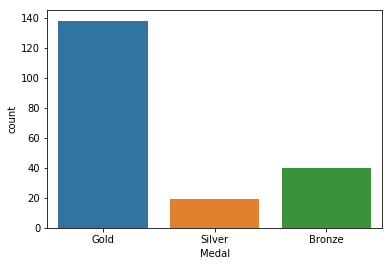

In [11]:
Medals_India = medals[medals.Team =='India']
Medals_India
sns.countplot(x='Medal', data = Medals_India)

## Most of the medals won by India were by HOCKEY

In [12]:
gold = athlete_events[(athlete_events.Medal == 'Gold')]
gold_India = gold.loc[gold['NOC']=='IND']
gold_India.Event.value_counts().reset_index(name='Medal').head(10)

,index,Medal
0,Hockey Men's Hockey,130
1,Alpinism Mixed Alpinism,7
2,"Shooting Men's Air Rifle, 10 metres",1


In [13]:
silver = athlete_events[(athlete_events.Medal == 'Silver')]
silver_India = silver.loc[silver['NOC']=='IND']
silver_India.Event.value_counts().reset_index(name='Medal').head(10)

,index,Medal
0,Hockey Men's Hockey,13
1,"Wrestling Men's Welterweight, Freestyle",1
2,Athletics Men's 200 metres Hurdles,1
3,Athletics Men's 200 metres,1
4,Badminton Women's Singles,1
5,Shooting Men's Double Trap,1
6,"Shooting Men's Rapid-Fire Pistol, 25 metres",1


In [14]:
bronze = athlete_events[(athlete_events.Medal == 'Bronze')]
bronze_India = bronze.loc[bronze['NOC']=='IND']
bronze_India.Event.value_counts().reset_index(name='Medal').head(10)

,index,Medal
0,Hockey Men's Hockey,30
1,"Wrestling Men's Welterweight, Freestyle",1
2,"Wrestling Women's Lightweight, Freestyle",1
3,"Shooting Men's Air Rifle, 10 metres",1
4,Weightlifting Women's Light-Heavyweight,1
5,"Wrestling Men's Bantamweight, Freestyle",1
6,Boxing Men's Middleweight,1
7,Badminton Women's Singles,1
8,"Wrestling Men's Lightweight, Freestyle",1
9,Boxing Women's Flyweight,1


In [15]:
Indiadata1 = merged_data[merged_data.NOC == 'IND']
Indiadata1.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
505,281,S. Abdul Hamid,M,NaN,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 110 metres Hurdles,NaN,India,NaN
506,281,S. Abdul Hamid,M,NaN,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 400 metres Hurdles,NaN,India,NaN
895,512,Shiny Kurisingal Abraham-Wilson,F,19.0,167.0,53.0,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 800 metres,NaN,India,NaN
896,512,Shiny Kurisingal Abraham-Wilson,F,19.0,167.0,53.0,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 4 x 400 metres Relay,NaN,India,NaN
897,512,Shiny Kurisingal Abraham-Wilson,F,23.0,167.0,53.0,India,IND,1988 Summer,1988,Summer,Seoul,Athletics,Athletics Women's 800 metres,NaN,India,NaN


### There a lot of null values in the above dataframe. Lets remove them to make it easier for our analysis

In [16]:
Indiadata = Indiadata1[Indiadata1.Medal.notnull()]
Indiadata.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
4732,2699,Shaukat Ali,M,30.0,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold,India,NaN
4736,2703,Syed Mushtaq Ali,M,22.0,165.0,61.0,India,IND,1964 Summer,1964,Summer,Tokyo,Hockey,Hockey Men's Hockey,Gold,India,NaN
5032,2864,Richard James Allen,M,25.0,172.0,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold,India,NaN
5033,2864,Richard James Allen,M,30.0,172.0,NaN,India,IND,1932 Summer,1932,Summer,Los Angeles,Hockey,Hockey Men's Hockey,Gold,India,NaN
5034,2864,Richard James Allen,M,34.0,172.0,NaN,India,IND,1936 Summer,1936,Summer,Berlin,Hockey,Hockey Men's Hockey,Gold,India,NaN


Text(0.5,1,'Distribution of Medals')

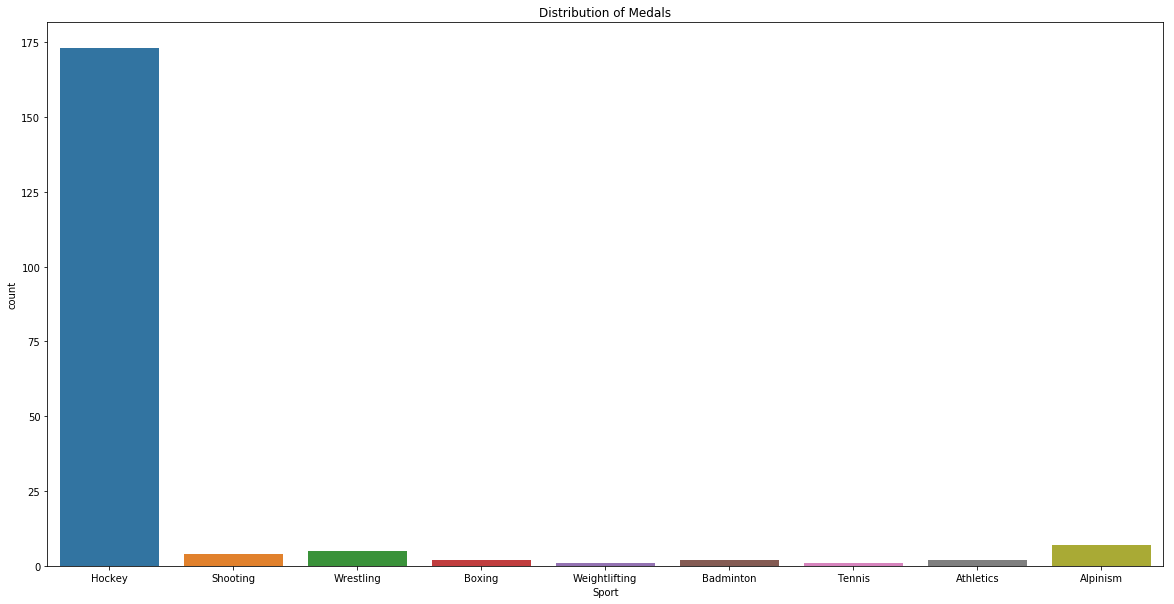

In [17]:
plt.figure(figsize=(20, 10))
sns.countplot(x='Sport', data = Indiadata)
plt.title('Distribution of Medals')

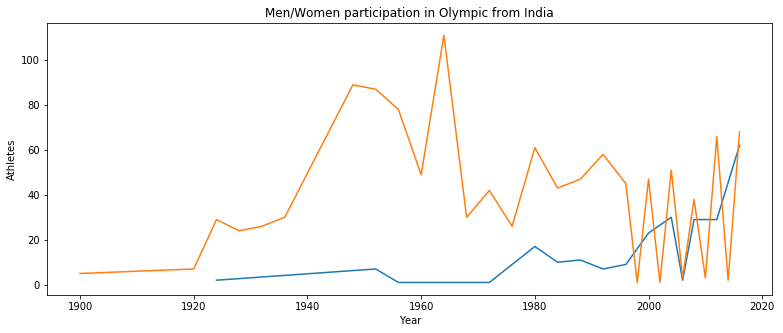

In [18]:
part = Indiadata1.groupby('Year')['Sex'].value_counts()
part.loc[:,'F'].plot(title='Men/Women participation in Olympic from India',figsize=(13,5)).set_ylabel("Athletes")
part.loc[:,'M'].plot()

### The above graph reveals that women participation increased after 2005

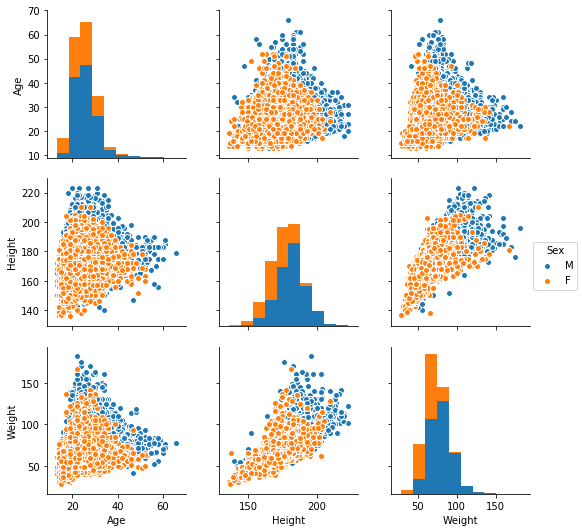

In [19]:
data_summer=athlete_events[athlete_events.Season=='Summer']
cleandata=data_summer[['Sex','Age','Height','Weight','Medal']].dropna()
sns.pairplot(cleandata, hue = 'Sex')

### The above pairplot reveals that height is positively correlated to weight and that men were taller and heavier comparitively.

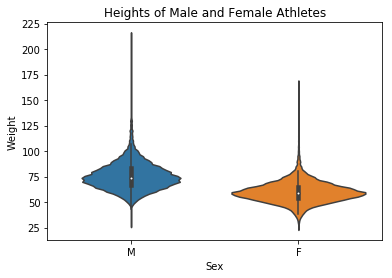

In [41]:
sns.violinplot(x='Sex',y='Weight',data=athlete_events)
plt.title('Heights of Male and Female Athletes')
plt.show()

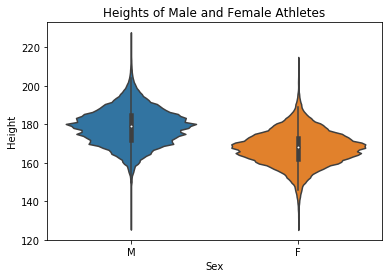

In [42]:
sns.violinplot(x='Sex',y='Height',data=athlete_events)
plt.title('Heights of Male and Female Athletes')
plt.show()

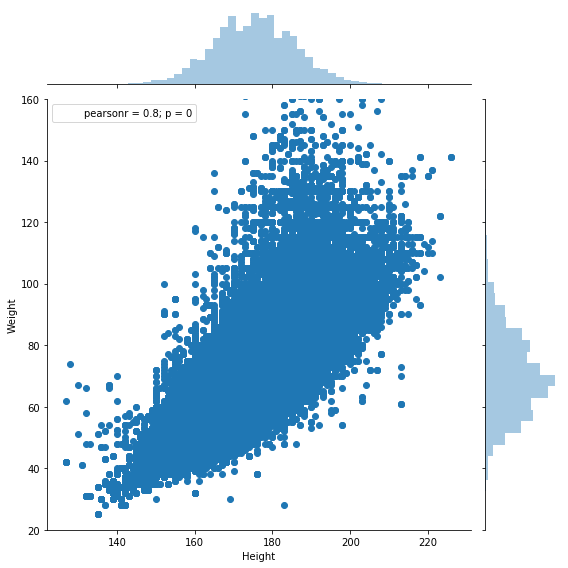

In [49]:
sns.jointplot(data = athlete_events, x = 'Height', y = 'Weight', kind = 'scatter', ylim = (20, 160), size = 8)

### large number of athletes are in the height range of 160cm to 200 cm and weight 60-140

### Predicting Gold medals using the height and the weight for Male

In [63]:
athlete_eventsna = athlete_events.dropna(subset=['Sex','Medal', 'Age', 'Weight', 'Height'])

In [69]:
data_female = athlete_eventsna.loc[athlete_eventsna['Sex'] == "F",['Sport','Medal', 'Age', 'Weight', 'Height']].drop_duplicates()
data_male = athlete_eventsna.loc[athlete_eventsna['Sex'] == "M",['Sport','Medal', 'Age', 'Weight', 'Height']].drop_duplicates()

In [73]:
data_male['target'] = np.where(data_male['Medal'] == 'Gold', 1, 0)

In [76]:
from sklearn import model_selection
from sklearn import metrics
from sklearn import neighbors
import statsmodels.api as sm
from patsy import dmatrices
Y, X = dmatrices('target ~ 0 + Weight + Height',
                data = data_male,
                return_type = 'dataframe')
y = Y['target'].values

accuracies = []

kfold = model_selection.StratifiedKFold(n_splits = 5, shuffle = True).split(X, y)

model = neighbors.KNeighborsClassifier(n_neighbors = 20,
                                      p = 2,
                                      weights = 'uniform')

for train, holdout in kfold:
    model.fit(X.iloc[train], y[train])
    prediction_on_test = model.predict(X.iloc[holdout])
    accuracies.append(metrics.accuracy_score(y[holdout], prediction_on_test))

np.mean(accuracies)

C:\Users\sushm\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


0.6614403692323648

### Predicting Gold medals using the height and the weight for  Female

In [78]:
data_female['target'] = np.where(data_female['Medal'] == 'Gold', 1, 0)

In [80]:
from sklearn import model_selection
from sklearn import metrics
from sklearn import neighbors
import statsmodels.api as sm
from patsy import dmatrices
Y, X = dmatrices('target ~ 0 + Weight + Height',
                data = data_female,
                return_type = 'dataframe')
y = Y['target'].values

accuracies = []

kfold = model_selection.StratifiedKFold(n_splits = 5, shuffle = True).split(X, y)

model = neighbors.KNeighborsClassifier(n_neighbors = 20,
                                      p = 2,
                                      weights = 'uniform')

for train, holdout in kfold:
    model.fit(X.iloc[train], y[train])
    prediction_on_test = model.predict(X.iloc[holdout])
    accuracies.append(metrics.accuracy_score(y[holdout], prediction_on_test))

np.mean(accuracies)

0.6757858935694996

### The above accuracies show that given a height and weight it is predicted the probability of winning a Gold Medal. The accuracy for males is 66% and for females is 67.5%